In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os

os.getcwd()

'/Users/sophiawu/QTW/caseStudy4/MSDS-7333-QTW-1'

In [2]:
from os import listdir
from os.path import isfile, join
dir_files = [f for f in os.listdir(os.getcwd()+'/data') if os.path.isfile(join(os.getcwd()+'/data', f))]

dir_files

['.DS_Store',
 '2year.arff',
 '3year.arff',
 'IDs_mapping.csv',
 '5year.arff',
 '4year.arff',
 'unique_m.csv',
 'diabetic_data.csv',
 'super_conducter_data.csv',
 '1year.arff',
 'train.csv']

In [3]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    temp_data = arff.loadarff(os.getcwd()+'/data/'+f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]
    
print(records)

ParseArffError: Error while parsing header, error was: 'utf-8' codec can't decode byte 0xff in position 1094: invalid start byte

In [4]:
full_df.shape

(0, 0)

In [5]:
full_df.head(5)

""


In [6]:
full_df.describe()

ValueError: Cannot describe a DataFrame without columns

In [7]:
full_df.columns.values

array([], dtype=object)

In [8]:
for c in full_df.columns:
    print('{} is formatted as a(n) {}'.format(c, full_df[c].dtype))

Attr1 is formatted as a(n) float64
Attr2 is formatted as a(n) float64
Attr3 is formatted as a(n) float64
Attr4 is formatted as a(n) float64
Attr5 is formatted as a(n) float64
Attr6 is formatted as a(n) float64
Attr7 is formatted as a(n) float64
Attr8 is formatted as a(n) float64
Attr9 is formatted as a(n) float64
Attr10 is formatted as a(n) float64
Attr11 is formatted as a(n) float64
Attr12 is formatted as a(n) float64
Attr13 is formatted as a(n) float64
Attr14 is formatted as a(n) float64
Attr15 is formatted as a(n) float64
Attr16 is formatted as a(n) float64
Attr17 is formatted as a(n) float64
Attr18 is formatted as a(n) float64
Attr19 is formatted as a(n) float64
Attr20 is formatted as a(n) float64
Attr21 is formatted as a(n) float64
Attr22 is formatted as a(n) float64
Attr23 is formatted as a(n) float64
Attr24 is formatted as a(n) float64
Attr25 is formatted as a(n) float64
Attr26 is formatted as a(n) float64
Attr27 is formatted as a(n) float64
Attr28 is formatted as a(n) float64
A

In [9]:
full_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [10]:
full_df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [11]:
full_df['class'].value_counts(normalize=True)

b'0'    0.951826
b'1'    0.048174
Name: class, dtype: float64

In [12]:
classes = []

for index, row in full_df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

In [13]:
classes

[b'0', b'1']

In [14]:
class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
class_dict

{b'0': '0', b'1': '1'}

In [15]:
full_df['class'] = full_df['class'].map(class_dict)

In [16]:
full_df['class'].unique()

array(['0', '1'], dtype=object)

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = full_df.loc[:, full_df.columns != 'class'].values
y = full_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

In [19]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_hat_rf_train = rf_clf.predict(X_train)
accuracy_score(y_hat_rf_train, y_train)

0.9999656132870259

In [21]:
confusion_matrix(y_train, y_hat_rf_train)

array([[27668,     0],
       [    1,  1412]])

In [22]:
y_hat_rf_test = rf_clf.predict(X_test)
accuracy_score(y_hat_rf_test, y_test)

0.9652331750907568

In [23]:
confusion_matrix(y_test, y_hat_rf_test)

array([[13608,    38],
       [  460,   218]])

Text(0.5, 1.0, 'Precision-Recall Curve')

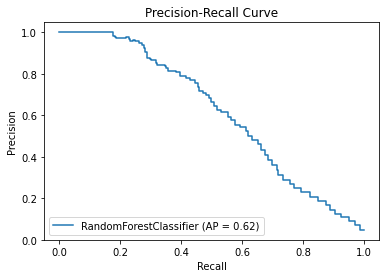

In [25]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf_clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve')

In [27]:
from sklearn.metrics import precision_score

precision_score(y_test, y_hat_rf_test, average=None)

array([0.96730168, 0.8515625 ])

In [28]:
from sklearn.metrics import recall_score

recall_score(y_test, y_hat_rf_test, average=None)

array([0.9972153 , 0.32153392])

In [29]:
rf_clf_2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split = 100, random_state=2)
rf_clf_2.fit(X_train, y_train)

rf_clf_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [30]:
y_hat_rf_2 = rf_clf_2.predict(X_train)
accuracy_score(y_hat_rf_2, y_train)

0.9617963618857673

In [31]:
y_hat_rf_2 = rf_clf_2.predict(X_test)
accuracy_score(y_hat_rf_2, y_test)

0.9597179558782463

In [32]:
confusion_matrix(y_test, y_hat_rf_2)

array([[13646,     0],
       [  577,   101]])

In [33]:
precision_score(y_test, y_hat_rf_2, average=None)

array([0.95943191, 1.        ])

In [34]:
recall_score(y_test, y_hat_rf_2, average=None)

array([1.        , 0.14896755])

In [38]:
y_fake = ['0'] * len(y_hat_rf_2)
accuracy_score(y_fake, y_test)

0.9526668528344038

In [39]:
recall_score(y_test, y_fake, average=None, zero_division = 0)

array([1., 0.])

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)


0.9602764590896398

In [41]:
clf.score(X_train, y_train)

0.9622090024414566

In [42]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.67338563e-03, 2.53690109e-03,
       1.84813939e-02, 0.00000000e+00, 0.00000000e+00, 5.48567290e-04,
       1.24581463e-03, 7.01375323e-04, 6.93740372e-03, 6.35773516e-04,
       9.87317964e-03, 0.00000000e+00, 0.00000000e+00, 2.25372670e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.20704396e-04,
       1.47121044e-02, 5.87555681e-03, 0.00000000e+00, 6.69417046e-03,
       1.90018371e-03, 7.13583565e-03, 6.36298470e-01, 1.32787581e-03,
       9.73916005e-03, 0.00000000e+00, 0.00000000e+00, 1.56523587e-03,
       0.00000000e+00, 8.94771705e-04, 1.65732164e-01, 0.00000000e+00,
       1.78212533e-03, 3.32848989e-03, 5.20941980e-03, 0.00000000e+00,
       6.90379506e-03, 1.55670974e-02, 8.42188537e-04, 9.61450147e-04,
       0.00000000e+00, 4.42407150e-02, 5.33686055e-04, 2.47200638e-03,
       0.00000000e+00, 0.00000000e+00, 1.23513960e-03, 1.30895098e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.71498314e-03,
      

In [43]:
full_df.to_csv('complete_dataset.csv', index=False)